# Intro to Machine Learning - Unsupervised Learning

We will now apply unsupervised learning to our King's County, Washington home sale data.  As a reminder, unsupervised techniques aren't meant to predict values or classifications, but rather to understand the intrinsic structure or identify outliers.  Here, we will do both.  As we previously did, we need to do our imports, read our data in and check it, and drop any columns we don't need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,lat,long,renovated
0,0,221900.0,0.333333,0.133333,0.123783,0.003108,0.0,0.0,0.545455,0.571498,0.217608,0.0
1,1,538000.0,0.333333,0.300000,0.317107,0.004072,0.4,0.0,0.545455,0.908959,0.166113,1.0
2,2,180000.0,0.222222,0.133333,0.066759,0.005743,0.0,0.0,0.454545,0.936143,0.237542,0.0
3,3,604000.0,0.444444,0.400000,0.232267,0.002714,0.0,0.0,0.545455,0.586939,0.104651,0.0
4,4,510000.0,0.333333,0.266667,0.193324,0.004579,0.0,0.0,0.636364,0.741354,0.393688,0.0


In [4]:
df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,lat,long,renovated
count,21075.000000,2.107500e+04,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000
mean,10788.673310,5.004194e+05,0.371862,0.277226,0.240681,0.008612,0.194050,0.003986,0.599098,0.647739,0.253657,0.039573
std,6234.638222,2.466856e+05,0.099159,0.097497,0.114436,0.024196,0.215259,0.063008,0.099627,0.224796,0.117742,0.194958
min,0.000000,7.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5389.500000,3.199500e+05,0.333333,0.200000,0.155772,0.002714,0.000000,0.000000,0.545455,0.498472,0.156977,0.000000
50%,10770.000000,4.450000e+05,0.333333,0.300000,0.222531,0.004260,0.000000,0.000000,0.545455,0.664951,0.239203,0.000000
75%,16188.500000,6.250000e+05,0.444444,0.333333,0.305981,0.006018,0.400000,0.000000,0.636364,0.841242,0.328904,0.000000
max,21612.000000,1.495000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df = df.drop(columns=['Unnamed: 0'])

In the regression tasks of our last lab, the true price value was okay since the algorithm only cared that the input values were on the same scale (which is why we normalized the values).  Now, we also need to scale the price column.  We will again use the ``MinMaxScaler``, but only on the price column.  Perform the fit and transform the column.  You'll notice that we have already pulled the values for the price and applied ``.reshape(-1,1)``.  This is because we need to tell the scaler that these are all related data columns.  Otherwise, it could mistakenly think this is a single row of many columns, so we need to explicitly format in the desired configuration.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['price'] = scaler.fit_transform(df['price'].values.reshape(-1,1))

Quickly check that we actually did what we wanted to the dataframe.

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,lat,long,renovated
0,0.103451,0.333333,0.133333,0.123783,0.003108,0.0,0.0,0.545455,0.571498,0.217608,0.0
1,0.326056,0.333333,0.300000,0.317107,0.004072,0.4,0.0,0.545455,0.908959,0.166113,1.0
2,0.073944,0.222222,0.133333,0.066759,0.005743,0.0,0.0,0.454545,0.936143,0.237542,0.0
3,0.372535,0.444444,0.400000,0.232267,0.002714,0.0,0.0,0.545455,0.586939,0.104651,0.0
4,0.306338,0.333333,0.266667,0.193324,0.004579,0.0,0.0,0.636364,0.741354,0.393688,0.0


If the data looks correct, let's start by fitting a k-means model.  We want to fit to get the correct number of clusters, but the first step is to make sure we can get it to work.  Begin by setting up a k-means model with 3 clusters.  

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

Now, fit the data.

In [9]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

With the fit model, call the ``.interia`` attribute to get the sum of squared distances to their closest cluster center.  As a performance metric, this is similar to the mean squared error we used in the supervised regression.

In [10]:
print(kmeans.inertia_)

2896.7335456138526


With this working, we now want to wrap these steps into a loop to step through a range of cluster numbers and track how the sum of the squared distances changes.  We can then determine how many clusters are present in the data by using the "elbow" method to see where the rate of the distance improvement begins to decline.

In [11]:
dist = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    dist.append(kmeans.inertia_)

Plot the distance measure vs the cluster number.  To make a plot like we saw in the lecture, you can change the linestyle to ``'.-'`` and then the ``linewidth`` and ``markersize`` parameters in Matplotlib's ``plot`` function.

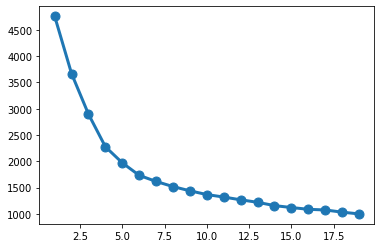

In [12]:
plt.plot(range(1,20), dist, '.-', linewidth=3, markersize='18')

How does the curve appear and how well-defined is the elbow?  Jot down some notes of your observations and your thoughts about what this is telling us about the data.  

Elbow curve notes:

As a second validation, let's use the silhouette score.  This metric measures the uniqueness of clusters by calculating the distance of points in one cluster to those in a neighboring cluster.  The metric takes on values between -1 and 1, with negative values meaning points are assigned to the wrong cluster, zero meaning they are overlapping, and closer to positive 1 meaning maximally distinct.

As we just did for the distance, we want to calculate the score for each loop and make a plot.  However, we first want to just get familiar with the functionality by running it on a single test case.  Construct a k-means model using the cluster number of your choosing, make predictions using the ``fit_predict`` method, and then calculate the silhoutte score.  The consistency of the Sci-kit Learn API makes using the ``fit_predict`` method easy, but you may need to look up how to call the ``silhouette_score`` function and what you need to pass it

In [13]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
predictions = kmeans.fit_predict(df)
silhouette_score(df, predictions)

0.28705585419767277

After a single silhouette score has been calculated, wrap it in a loop and then plot the silhouette score vs. the number of clusters.

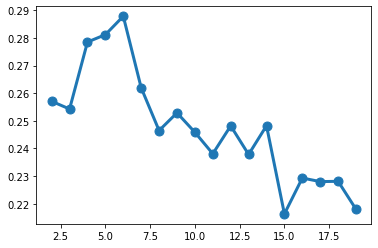

In [14]:
sil_score = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    predictions = kmeans.fit_predict(df)
    sil_score.append(silhouette_score(df, predictions))
    
plt.plot(range(2,20), sil_score, '.-', linewidth=3, markersize='18')

Let's move to the more sophisticated DBSCAN model.  DBSCAN offers many benefits for clustering applications because it finds the cluster number by itself and it also identifies outliers.

First let's define a model.  We can define several hyperparameters including the maximum distance between samples in a cluster (the ``eps`` parameter) and the minimum number of samples to define a cluster (``min_samples``).  

In [15]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.25, min_samples=10)

Let's fit the model on data.

In [16]:
db.fit(df)

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

With this fit model, pull out the labels so we can perform some calculations

In [17]:
labels = db.labels_

With the labels in a list, we can count the number of clusters and the number of points considered "noise."  By default, DBSCAN labels outliers as ``-1``.

In [18]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Print out these values

In [19]:
print('Cluster Number:  ', n_clusters_)
print('Outlier Number:  ', n_noise_)

Cluster Number:   4
Outlier Number:   194


Calculate the silhouette score to see if this is improved.

In [20]:
print('Silhouette Score:  ')
silhouette_score(df, labels)

Silhouette Score:  


0.37739808469128383

The isolation forest identifies outliers by randomly slicing your dataset and determining how easy it is to separate points from the bulk of the data.  Let's begin by defining the model.  Like the random forest model, choose a large-ish value for the ``n_estimators`` parameter.

In [21]:
from sklearn.ensemble import IsolationForest

if_model = IsolationForest(n_estimators=1000, behaviour='new', contamination='auto')

Using the ``fit_predict`` function, fit the isolation forest and assign labels (outlier or not).

In [22]:
df['labels'] = if_model.fit_predict(df)

Run the following code to  count how many outliers the model identifies.

In [23]:
list(df['labels']).count(-1)

2241

Let's conclude by taking a look at the outliers and seeing if there are certain prices where sells that are considered anomalies can be found.  The ease with which we can plot histograms makes this fairly straightforward once the data is in the right form.  Since we normalized the values with the ``MinMaxScaler`` we have to undo this transformation with ``inverse_transform``.  We've pulled the data and gotten it into the right form so you can the transform below.

In [24]:
full_price_data_scaled = df['price'].values.reshape(-1, 1)
anomaly_price_data_scaled = df[df['labels']==-1]['price'].values.reshape(-1, 1)

full_price_data = scaler.inverse_transform(full_price_data_scaled)
anomaly_price_data = scaler.inverse_transform(anomaly_price_data_scaled)

How use Seaborn to plot the distributions and see how they compare.

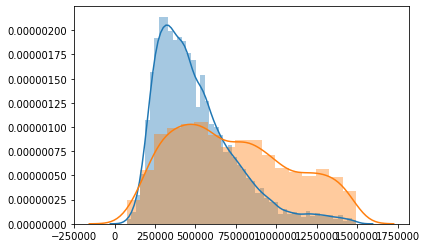

In [25]:
sns.distplot(full_price_data)
sns.distplot(anomaly_price_data)

What can you conclude about the frequency of outliers and the relation to price?

Outlier notes: